## Final Project



Testing with Covid care dataset and nytimes country level cumulative cases data    
https://github.com/covidcaremap/covid19-healthsystemcapacity/tree/master/data    
https://github.com/nytimes/covid-19-data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
covid_care_df = pd.read_csv (r'us_healthcare_capacity-county-CovidCareMap.csv')
us_counties_df = pd.read_csv(r'us-counties.csv')
capacity_state = pd.read_csv("capacity_state.csv")

In [3]:
state_abbs=capacity_state[['State','State Name']]

In [4]:
# sum across county
covid_care_df.columns = covid_care_df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
covid_care_df = covid_care_df.rename(columns={'county_name': 'county'})
covid_care_df = covid_care_df.rename(columns={'state': 'State'})
covid_care_df = covid_care_df.groupby(['county', 'State']).sum()
covid_care_df.index.name = 'county'
covid_care_df.reset_index(inplace=True)
covid_care_df = pd.merge(covid_care_df, state_abbs, how='left', on=['State'])
covid_care_df['location'] = covid_care_df['county'].str.cat(covid_care_df['State Name'], sep = ", ")
covid_care_df = covid_care_df.drop(['State', 'fips_code'], axis = 1)
covid_care_df

,county,staffed_all_beds,staffed_icu_beds,licensed_all_beds,all_bed_occupancy_rate,icu_bed_occupancy_rate,population,population_20+,population_65+,staffed_all_beds_[per_1000_people],staffed_all_beds_[per_1000_adults_20+],staffed_all_beds_[per_1000_elderly_65+],staffed_icu_beds_[per_1000_people],staffed_icu_beds_[per_1000_adults_20+],staffed_icu_beds_[per_1000_elderly_65+],licensed_all_beds_[per_1000_people],licensed_all_beds_[per_1000_adults_20+],licensed_all_beds_[per_1000_elderly_65+],State Name,location
0,Abbeville,25.0,6.0,25.0,0.32,0.03,24541.0,18884.0,5343.0,1.019,1.324,4.679,0.244,0.318,1.123,1.019,1.324,4.679,South Carolina,"Abbeville, South Carolina"
1,Acadia,205.0,4.0,186.0,0.28,0.85,62190.0,44673.0,9491.0,3.296,4.589,21.599,0.064,0.090,0.421,2.991,4.164,19.598,Louisiana,"Acadia, Louisiana"
2,Ada,1195.0,105.0,1350.0,0.62,0.55,469966.0,345855.0,67792.0,2.543,3.455,17.627,0.223,0.304,1.549,2.873,3.903,19.914,Idaho,"Ada, Idaho"
3,Adair,25.0,0.0,25.0,0.04,0.00,7063.0,5412.0,1603.0,3.540,4.619,15.596,0.000,0.000,0.000,3.540,4.619,15.596,Iowa,"Adair, Iowa"
4,Adair,49.0,0.0,77.0,0.01,0.00,19215.0,14529.0,3571.0,2.550,3.373,13.722,0.000,0.000,0.000,4.007,5.300,21.563,Kentucky,"Adair, Kentucky"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2528,York,318.0,24.0,338.0,0.74,0.69,274118.0,200604.0,39236.0,1.160,1.585,8.105,0.088,0.120,0.612,1.233,1.685,8.615,South Carolina,"York, South Carolina"
2529,Young,50.0,0.0,50.0,0.28,0.00,18045.0,13298.0,3671.0,2.771,3.760,13.620,0.000,0.000,0.000,2.771,3.760,13.620,Texas,"Young, Texas"
2530,Yuba,209.0,24.0,221.0,0.74,0.67,78041.0,54627.0,9955.0,2.678,3.826,20.994,0.308,0.439,2.411,2.832,4.046,22.200,California,"Yuba, California"
2531,Yuma,457.0,42.0,457.0,0.48,0.40,212128.0,152468.0,39828.0,2.154,2.997,11.474,0.198,0.275,1.055,2.154,2.997,11.474,Arizona,"Yuma, Arizona"


In [5]:
# select most recent date for cumulative data and sum across county
April_date = us_counties_df['date'] == '2020-04-22'
April_us_counties_df = us_counties_df[April_date]
April_us_counties_df = April_us_counties_df.drop(['fips', 'date'], 1)
April_us_counties_df = April_us_counties_df.groupby(['county', 'state']).sum()
April_us_counties_df.index.name = 'county'
April_us_counties_df.reset_index(inplace=True)
April_us_counties_df['location'] = April_us_counties_df['county'].str.cat(April_us_counties_df['state'], sep = ", ")
#April_us_counties_df = April_us_counties_df.drop(['county', 'state'], axis = 1)
April_us_counties_df

,county,state,cases,deaths,location
0,Abbeville,South Carolina,22,0,"Abbeville, South Carolina"
1,Acadia,Louisiana,117,7,"Acadia, Louisiana"
2,Accomack,Virginia,52,1,"Accomack, Virginia"
3,Ada,Idaho,597,14,"Ada, Idaho"
4,Adair,Iowa,1,0,"Adair, Iowa"
...,...,...,...,...,...
2788,Yukon-Koyukuk Census Area,Alaska,1,0,"Yukon-Koyukuk Census Area, Alaska"
2789,Yuma,Arizona,28,1,"Yuma, Arizona"
2790,Yuma,Colorado,4,0,"Yuma, Colorado"
2791,Zapata,Texas,7,0,"Zapata, Texas"


We have 1568 counties recorded in the CovidCare dataset and 1654 counties recorded in the US cases of covid-19 dataset. 

In [6]:
data = pd.merge(covid_care_df, April_us_counties_df, how = 'left', on='location')
data_final = data.drop(['county_y', 'location', 'State Name'], axis = 1)
data_final = data_final.rename(columns={'population_20+': 'population_20'})
data_final = data_final.rename(columns={'population_65+': 'population_65'})
data_final = data_final.rename(columns={'licensed_all_beds_[per_1000_people]': 'licensed_all_beds_per_1000_people'})
data_final
data_final.to_csv(r'clean_data.csv', index = False)

In [7]:
data_final

,county_x,staffed_all_beds,staffed_icu_beds,licensed_all_beds,all_bed_occupancy_rate,icu_bed_occupancy_rate,population,population_20,population_65,staffed_all_beds_[per_1000_people],...,staffed_all_beds_[per_1000_elderly_65+],staffed_icu_beds_[per_1000_people],staffed_icu_beds_[per_1000_adults_20+],staffed_icu_beds_[per_1000_elderly_65+],licensed_all_beds_per_1000_people,licensed_all_beds_[per_1000_adults_20+],licensed_all_beds_[per_1000_elderly_65+],state,cases,deaths
0,Abbeville,25.0,6.0,25.0,0.32,0.03,24541.0,18884.0,5343.0,1.019,...,4.679,0.244,0.318,1.123,1.019,1.324,4.679,South Carolina,22.0,0.0
1,Acadia,205.0,4.0,186.0,0.28,0.85,62190.0,44673.0,9491.0,3.296,...,21.599,0.064,0.090,0.421,2.991,4.164,19.598,Louisiana,117.0,7.0
2,Ada,1195.0,105.0,1350.0,0.62,0.55,469966.0,345855.0,67792.0,2.543,...,17.627,0.223,0.304,1.549,2.873,3.903,19.914,Idaho,597.0,14.0
3,Adair,25.0,0.0,25.0,0.04,0.00,7063.0,5412.0,1603.0,3.540,...,15.596,0.000,0.000,0.000,3.540,4.619,15.596,Iowa,1.0,0.0
4,Adair,49.0,0.0,77.0,0.01,0.00,19215.0,14529.0,3571.0,2.550,...,13.722,0.000,0.000,0.000,4.007,5.300,21.563,Kentucky,60.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2528,York,318.0,24.0,338.0,0.74,0.69,274118.0,200604.0,39236.0,1.160,...,8.105,0.088,0.120,0.612,1.233,1.685,8.615,South Carolina,166.0,3.0
2529,Young,50.0,0.0,50.0,0.28,0.00,18045.0,13298.0,3671.0,2.771,...,13.620,0.000,0.000,0.000,2.771,3.760,13.620,Texas,4.0,1.0
2530,Yuba,209.0,24.0,221.0,0.74,0.67,78041.0,54627.0,9955.0,2.678,...,20.994,0.308,0.439,2.411,2.832,4.046,22.200,California,16.0,1.0
2531,Yuma,457.0,42.0,457.0,0.48,0.40,212128.0,152468.0,39828.0,2.154,...,11.474,0.198,0.275,1.055,2.154,2.997,11.474,Arizona,28.0,1.0


## Baseline Methods

Exploratory data analysis and figures/graphs. Summary statistics. 

In [8]:
data_final.describe()

,staffed_all_beds,staffed_icu_beds,licensed_all_beds,all_bed_occupancy_rate,icu_bed_occupancy_rate,population,population_20,population_65,staffed_all_beds_[per_1000_people],staffed_all_beds_[per_1000_adults_20+],staffed_all_beds_[per_1000_elderly_65+],staffed_icu_beds_[per_1000_people],staffed_icu_beds_[per_1000_adults_20+],staffed_icu_beds_[per_1000_elderly_65+],licensed_all_beds_per_1000_people,licensed_all_beds_[per_1000_adults_20+],licensed_all_beds_[per_1000_elderly_65+],cases,deaths
count,2533.000000,2533.000000,2533.000000,2533.000000,2533.000000,2.533000e+03,2.533000e+03,2.533000e+03,2533.000000,2533.000000,2533.000000,2533.000000,2533.000000,2533.000000,2533.000000,2533.000000,2533.000000,2247.000000,2247.000000
mean,321.390051,31.295697,417.430320,0.403296,0.274319,1.254248e+05,9.395768e+04,1.998920e+04,2.557675,3.404208,13.994499,0.157735,0.210043,0.923498,3.419987,4.548942,18.810545,297.787272,13.753894
std,993.742647,101.463512,1267.804427,0.218802,0.298320,3.690200e+05,2.767253e+05,5.272502e+04,2.387380,3.133939,12.617482,0.229781,0.305237,1.364687,4.038226,5.263299,21.701071,1568.831693,78.418657
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,25.000000,0.000000,25.000000,0.220000,0.000000,1.475500e+04,1.114800e+04,2.889000e+03,1.220000,1.591000,6.555000,0.000000,0.000000,0.000000,1.546000,2.055000,8.248000,6.000000,0.000000
50%,50.000000,5.000000,75.000000,0.390000,0.150000,3.406600e+04,2.541000e+04,6.369000e+03,1.976000,2.628000,10.890000,0.111000,0.146000,0.597000,2.578000,3.430000,13.977000,23.000000,1.000000
75%,205.000000,18.000000,263.000000,0.580000,0.540000,9.210100e+04,6.901100e+04,1.550600e+04,3.069000,4.106000,17.361000,0.236000,0.314000,1.320000,4.034000,5.384000,22.527000,95.000000,4.000000
max,23071.000000,2305.000000,27400.000000,1.460000,1.260000,1.010552e+07,7.658126e+06,1.375957e+06,30.373000,39.077000,147.385000,3.728000,4.797000,18.824000,97.226000,120.423000,463.326000,31555.000000,1764.000000


## Methods
1. model capability using multiple linear regression.  
2. Apply multivariate bootstrap techniques with hypothesis testing for model selection.  
3. Clustering (hierarchical clustering) for capability classification based on US regions.   

### Step 1:

In [77]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_regression, SelectKBest, chi2
import statsmodels.api as sm
import numpy as np
from statsmodels.formula.api import ols

In [60]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [94]:
X = data_final[['population_65', 'population','licensed_all_beds', 
                       'staffed_all_beds', 'population_20','licensed_all_beds_per_1000_people']]
Y = data_final['cases']

In [95]:
#with state - cases
fit = ols('cases ~ C(state) + population + licensed_all_beds + population_65 + staffed_all_beds + population_20 + licensed_all_beds_per_1000_people', data = data_final).fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  cases   R-squared:                       0.462
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                     33.63
Date:                Fri, 24 Apr 2020   Prob (F-statistic):          1.11e-250
Time:                        17:42:02   Log-Likelihood:                -19024.
No. Observations:                2247   AIC:                         3.816e+04
Df Residuals:                    2190   BIC:                         3.849e+04
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                          -101.8602    153.630     -0.663      0.507    -403.136     199.416
C(state)[T.Alaska]                 -108.2313   1175.313     -0.092      0.927   -2413.076    2196.613
C(state)[T.Arizona]                -915.9012    354.006     -2.587      0.010   -1610.124    -221.678
C(state)[T.Arkansas]                 21.6042    219.640      0.098      0.922    -409.120     452.328
C(state)[T.California]             -847.5684    228.311     -3.712      0.000   -1295.297    -399.840
C(state)[T.Colorado]                 83.2479    234.835      0.354      0.723    -377.275     543.771
C(state)[T.Connecticut]            1597.8171    441.697      3.617      0.000     731.628    2464.006
C(state)[T.Delaware]                122.3923    691.164      0.177      0.859   -1233.013    1477.798
C(state)[T.District of Columbia]    963.1338   1191.102      0.809      0.419   -1372.674    3298.941
C(state)[T.Florida]                -868.8975    223.238     -3.892      0.000   -1306.679    -431.116
C(state)[T.Georgia]                 124.5460    187.798      0.663      0.507    -243.735     492.828
C(state)[T.Hawaii]                 -798.7176    603.873     -1.323      0.186   -1982.941     385.506
C(state)[T.Idaho]                    64.0589    281.735      0.227      0.820    -488.438     616.555
C(state)[T.Illinois]                150.4306    200.876      0.749      0.454    -243.497     544.358
C(state)[T.Indiana]                 108.7715    202.240      0.538      0.591    -287.830     505.373
C(state)[T.Iowa]                     56.6837    201.493      0.281      0.778    -338.453     451.821
C(state)[T.Kansas]                   91.1268    208.868      0.436      0.663    -318.474     500.728
C(state)[T.Kentucky]                 24.7038    202.466      0.122      0.903    -372.341     421.749
C(state)[T.Louisiana]               370.3924    215.540      1.718      0.086     -52.292     793.077
C(state)[T.Maine]                  -154.9223    336.584     -0.460      0.645    -814.979     505.134
C(state)[T.Maryland]                105.6727    296.353      0.357      0.721    -475.490     686.836
C(state)[T.Massachusetts]          1558.4422    348.906      4.467      0.000     874.221    2242.663
C(state)[T.Michigan]                209.0422    206.806      1.011      0.312    -196.513     614.598
C(state)[T.Minnesota]               -46.6743    203.930     -0.229      0.819    -446.591     353.242
C(state)[T.Mississippi]              95.9194    202.483      0.474      0.636    -301.160     492.999
C(state)[T.Missouri]                -34.5761    209.381     -0.165      0.869    -445.181     376.029
C(state)[T.Montana]                  73.6227    270.223      0.272      0.785    -456.298     603.544
C(state)[T.Nebraska]   

In [96]:
#without state - cases
fit = ols('cases ~ + population + licensed_all_beds + population_65 + staffed_all_beds + population_20 + licensed_all_beds_per_1000_people', data = data_final).fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  cases   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.362
Method:                 Least Squares   F-statistic:                     213.5
Date:                Fri, 24 Apr 2020   Prob (F-statistic):          8.16e-216
Time:                        17:49:14   Log-Likelihood:                -19213.
No. Observations:                2247   AIC:                         3.844e+04
Df Residuals:                    2240   BIC:                         3.848e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -9.7698     41.739     -0.234      0.815     -91.622      72.082
population                           -0.0115      0.002     -4.628      0.000      -0.016      -0.007
licensed_all_beds                     0.9584      0.167      5.737      0.000       0.631       1.286
population_65                         0.0169      0.003      4.852      0.000       0.010       0.024
staffed_all_beds                     -0.9738      0.234     -4.168      0.000      -1.432      -0.516
population_20                         0.0146      0.004      3.937      0.000       0.007       0.022
licensed_all_beds_per_1000_people   -21.8583      9.504     -2.300      0.022     -40.496      -3.221
==============================================================================
Omnibus:                     3966.308   Durbin-Watson:                   1.878
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4782807.665
Skew:                          12.218   Prob(JB):                         0.00
Kurtosis:                     227.694   Cond. No.                     8.13e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [99]:
#with state - death
fit = ols('deaths ~ C(state) + population + licensed_all_beds + population_65 + staffed_all_beds + population_20 + licensed_all_beds_per_1000_people', data = data_final).fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 deaths   R-squared:                       0.426
Model:                            OLS   Adj. R-squared:                  0.411
Method:                 Least Squares   F-statistic:                     28.99
Date:                Fri, 24 Apr 2020   Prob (F-statistic):          2.46e-220
Time:                        18:15:52   Log-Likelihood:                -12366.
No. Observations:                2247   AIC:                         2.485e+04
Df Residuals:                    2190   BIC:                         2.517e+04
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -6.8806      7.936     -0.867      0.386     -22.444       8.683
C(state)[T.Alaska]                   -0.9458     60.715     -0.016      0.988    -120.010     118.119
C(state)[T.Arizona]                 -50.3091     18.287     -2.751      0.006     -86.171     -14.447
C(state)[T.Arkansas]                  1.5384     11.346      0.136      0.892     -20.712      23.789
C(state)[T.California]              -43.9382     11.794     -3.725      0.000     -67.067     -20.809
C(state)[T.Colorado]                  6.1284     12.131      0.505      0.613     -17.661      29.918
C(state)[T.Connecticut]             135.5324     22.817      5.940      0.000      90.787     180.278
C(state)[T.Delaware]                -16.0441     35.704     -0.449      0.653     -86.062      53.974
C(state)[T.District of Columbia]     40.0718     61.530      0.651      0.515     -80.592     160.736
C(state)[T.Florida]                 -55.2314     11.532     -4.789      0.000     -77.846     -32.616
C(state)[T.Georgia]                   6.9927      9.701      0.721      0.471     -12.032      26.018
C(state)[T.Hawaii]                  -45.3859     31.195     -1.455      0.146    -106.561      15.789
C(state)[T.Idaho]                     3.2403     14.554      0.223      0.824     -25.301      31.781
C(state)[T.Illinois]                  7.2053     10.377      0.694      0.488     -13.144      27.555
C(state)[T.Indiana]                   7.6384     10.447      0.731      0.465     -12.849      28.126
C(state)[T.Iowa]                      2.4989     10.409      0.240      0.810     -17.913      22.911
C(state)[T.Kansas]                    5.4737     10.790      0.507      0.612     -15.686      26.633
C(state)[T.Kentucky]                  2.8667     10.459      0.274      0.784     -17.644      23.377
C(state)[T.Louisiana]                23.3987     11.134      2.101      0.036       1.564      45.234
C(state)[T.Maine]                    -7.9099     17.387     -0.455      0.649     -42.007      26.187
C(state)[T.Maryland]                 -0.6741     15.309     -0.044      0.965     -30.696      29.348
C(state)[T.Massachusetts]            86.6013     18.024      4.805      0.000      51.256     121.947
C(state)[T.Michigan]                 28.2040     10.683      2.640      0.008       7.254      49.154
C(state)[T.Minnesota]                -0.5263     10.535     -0.050      0.960     -21.185      20.133
C(state)[T.Mississippi]               5.2654     10.460      0.503      0.615     -15.247      25.778
C(state)[T.Missouri]                 -0.9873     10.816     -0.091      0.927     -22.198      20.224
C(state)[T.Montana]                   4.0106     13.959      0.287      0.774     -23.364      31.385
C(state)[T.Nebraska]   

In [101]:
#without state - death
fit = ols('deaths ~ + population + licensed_all_beds + population_65 + staffed_all_beds + population_20 + licensed_all_beds_per_1000_people', data = data_final).fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 deaths   R-squared:                       0.310
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     167.7
Date:                Fri, 24 Apr 2020   Prob (F-statistic):          1.90e-176
Time:                        18:16:57   Log-Likelihood:                -12572.
No. Observations:                2247   AIC:                         2.516e+04
Df Residuals:                    2240   BIC:                         2.520e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -1.4702      2.173     -0.677      0.499      -5.731       2.791
population                           -0.0005      0.000     -4.237      0.000      -0.001      -0.000
licensed_all_beds                     0.0472      0.009      5.430      0.000       0.030       0.064
population_65                         0.0012      0.000      6.526      0.000       0.001       0.002
staffed_all_beds                     -0.0537      0.012     -4.417      0.000      -0.078      -0.030
population_20                         0.0006      0.000      3.285      0.001       0.000       0.001
licensed_all_beds_per_1000_people    -0.9003      0.495     -1.820      0.069      -1.871       0.070
==============================================================================
Omnibus:                     3896.052   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4438132.366
Skew:                          11.766   Prob(JB):                         0.00
Kurtosis:                     219.448   Cond. No.                     8.13e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

17 predictors for # cases. Predicting cases for each county in the US.

In [102]:
# separate input features and output from dataset
# output is cases
# test size 20%, 80% for training
X = data_final.iloc[:, 1:18]
Y = data_final.iloc[:, 20]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state= 0)

In [58]:
model = linear_model.LinearRegression()
model.fit(X_train, Y_train)

ValueError: could not convert string to float: 'Indiana'

In [35]:
print('Intercept: \n', model.intercept_)
print('Coefficients: \n', model.coef_)

Intercept: 
 -36.03122811754565
Coefficients: 
 [-1.32897868e+00 -8.05789990e-01  1.37526387e+00  1.58347596e+02
 -8.67680550e+01 -1.50170795e-02  2.01110800e-02  1.01402916e-02
  5.34077814e+02 -5.01348205e+02  3.24266309e+01 -3.49388486e+03
  2.06069047e+03  9.11174457e+01 -5.29871291e+02  4.59989663e+02
 -2.31229426e+01]


In [36]:
coeff_df = pd.DataFrame(model.coef_, X.columns, columns = ['Coefficient'])
print(coeff_df)

                                          Coefficient
staffed_all_beds                            -1.328979
staffed_icu_beds                            -0.805790
licensed_all_beds                            1.375264
all_bed_occupancy_rate                     158.347596
icu_bed_occupancy_rate                     -86.768055
population                                  -0.015017
population_20+                               0.020111
population_65+                               0.010140
staffed_all_beds_[per_1000_people]         534.077814
staffed_all_beds_[per_1000_adults_20+]    -501.348205
staffed_all_beds_[per_1000_elderly_65+]     32.426631
staffed_icu_beds_[per_1000_people]       -3493.884855
staffed_icu_beds_[per_1000_adults_20+]    2060.690471
staffed_icu_beds_[per_1000_elderly_65+]     91.117446
licensed_all_beds_[per_1000_people]       -529.871291
licensed_all_beds_[per_1000_adults_20+]    459.989663
licensed_all_beds_[per_1000_elderly_65+]   -23.122943


      Actual    Predicted
1730     6.0    60.515183
1455   388.0   502.647046
1829    57.0   -49.025795
2330    14.0    74.766101
1851    15.0    52.296272
1863     6.0    31.237497
2200  1317.0  1032.207820
1792     2.0    15.360479
674     35.0    97.207736
1616     7.0    42.314454


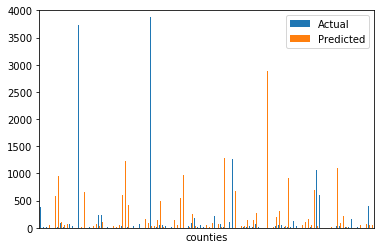

In [37]:
# predict output
y_pred = model.predict(X_test)
linear_model_diff = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
print(linear_model_diff.head(10))
linear_model_diff.plot(kind = 'bar')
plt.ylim(0, 4000)
plt.xticks([])
plt.xlabel('counties')
plt.show()

Forward selection to narrow down variables

In [38]:
def forward_selection(data, target, significance_level=0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

In [39]:
forward_selection(X, Y)

/opt/anaconda3/envs/Computational_methods/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


['population_65+',
 'population',
 'licensed_all_beds',
 'staffed_all_beds',
 'population_20+',
 'licensed_all_beds_[per_1000_people]']

In [40]:
X = data_final[['population_65+', 'population','licensed_all_beds', 
                       'staffed_all_beds', 'population_20+','licensed_all_beds_[per_1000_people]']]
Y = data_final.iloc[:, 20]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state= 0)

In [41]:
model = linear_model.LinearRegression()
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
print('Intercept: \n', model.intercept_)
print('Coefficients: \n', model.coef_)

Intercept: 
 -3.9942311248649958
Coefficients: 
 [ 2.07760617e-02 -6.75982260e-03  1.33192224e+00 -1.38844207e+00
  7.29367742e-03 -2.96555165e+01]


In [43]:
coeff_df = pd.DataFrame(model.coef_, X.columns, columns = ['Coefficient'])
print(coeff_df)

                                     Coefficient
population_65+                          0.020776
population                             -0.006760
licensed_all_beds                       1.331922
staffed_all_beds                       -1.388442
population_20+                          0.007294
licensed_all_beds_[per_1000_people]   -29.655516


In [44]:
y_pred = model.predict(X_test)
print('Mean squared error: %.2f'% mean_squared_error(Y_test,y_pred))
print('R-square: %.2f' % r2_score(Y_test,y_pred))



Mean squared error: 1882381.84
R-square: 0.26


In [45]:
def backward_elimination(data, target,significance_level = 0.05):
    features = data.columns.tolist()
    while(len(features)>0):
        features_with_constant = sm.add_constant(data[features])
        p_values = sm.OLS(target, features_with_constant).fit().pvalues[1:]
        max_p_value = p_values.max()
        if(max_p_value >= significance_level):
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
        else:
            break 
    return features

In [46]:
backward_elimination(X,Y)

/opt/anaconda3/envs/Computational_methods/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


['population_65+',
 'population',
 'licensed_all_beds',
 'staffed_all_beds',
 'population_20+',
 'licensed_all_beds_[per_1000_people]']

In [47]:
def stepwise_selection(data, target,SL_in=0.05,SL_out = 0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<SL_in):
            best_features.append(new_pval.idxmin())
            while(len(best_features)>0):
                best_features_with_constant = sm.add_constant(data[best_features])
                p_values = sm.OLS(target, best_features_with_constant).fit().pvalues[1:]
                max_p_value = p_values.max()
                if(max_p_value >= SL_out):
                    excluded_feature = p_values.idxmax()
                    best_features.remove(excluded_feature)
                else:
                    break 
        else:
            break
    return best_features

In [48]:
stepwise_selection(X,Y)

['population_65+',
 'population',
 'licensed_all_beds',
 'staffed_all_beds',
 'population_20+',
 'licensed_all_beds_[per_1000_people]']